In [31]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

In [32]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [33]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
## training and test datasets

#data_train = pd.read_csv('/home/kanhaiya/neural_network_biology/train_ann_term.csv')
#data_test = pd.read_csv('/home/kanhaiya/neural_network_biology/test_ann_term.csv')
data_train = pd.read_csv('../train_ann_term.csv')
data_test = pd.read_csv('../test_ann_term.csv')

In [35]:
print(data_train)

       class  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          1   0.907542    0.329147    0.359412                  1.497970   
1          1   0.798835    1.470639   -1.635975                  0.453773   
2          0   1.344385   -0.876626    0.935913                  1.992050   
3          0   1.595839   -0.607811    0.007075                  1.818450   
4          1   0.409391   -1.884684   -1.027292                  1.672452   
...      ...        ...         ...         ...                       ...   
68631      0   0.631747   -1.732745    0.734498                  0.647226   
68632      0   0.967752   -0.317568   -1.579379                  0.512029   
68633      1   0.908091   -0.825006   -0.830871                  0.736298   
68634      0   0.903699    0.261943   -0.429149                  1.892855   
68635      0   0.566047   -0.317568    0.062561                  0.358186   

       missing_energy_phi    jet1pt   jet1eta   jet1phi  jet1b.tag  ...  \


In [36]:
feature_names = data_train.columns[1:-1]  # we skip the first and last column

In [38]:
# Create the model 

network_input = Input( shape = (neural_network_input_dimension))
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
neural_network_layer = Dense(1, activation = "sigmoid")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, to_file='neural_network_graph.pdf')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 16)                464       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [39]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

In [40]:
# fit_model

discriminator_history = model.fit(sample_training, target_training.ravel(), epochs=discriminator_epochs, batch_size = batchSize, sample_weight = weight_train.ravel(), validation_data = (sample_validation, target_validation, weight_test.ravel()))
discriminator_history_array.append(discriminator_history)

Epoch 1/6
537/537 [==============================] - 8s 13ms/step - loss: 0.0354 - accuracy: 0.5464 - binary_accuracy: 0.5490 - val_loss: 0.0329 - val_accuracy: 0.6031 - val_binary_accuracy: 0.6029
Epoch 2/6
537/537 [==============================] - 3s 5ms/step - loss: 0.0327 - accuracy: 0.6115 - binary_accuracy: 0.6122 - val_loss: 0.0325 - val_accuracy: 0.6165 - val_binary_accuracy: 0.6145
Epoch 3/6
537/537 [==============================] - 3s 5ms/step - loss: 0.0325 - accuracy: 0.6193 - binary_accuracy: 0.6184 - val_loss: 0.0323 - val_accuracy: 0.6232 - val_binary_accuracy: 0.6210
Epoch 4/6
537/537 [==============================] - 3s 5ms/step - loss: 0.0323 - accuracy: 0.6200 - binary_accuracy: 0.6206 - val_loss: 0.0322 - val_accuracy: 0.6272 - val_binary_accuracy: 0.6254
Epoch 5/6
537/537 [==============================] - 3s 6ms/step - loss: 0.0319 - accuracy: 0.6276 - binary_accuracy: 0.6270 - val_loss: 0.0321 - val_accuracy: 0.6287 - val_binary_accuracy: 0.6258
Epoch 6/6
537/

In [41]:
# predict_model

model_prediction = model.predict(sample_validation).ravel()
model_val_prediction = model.predict(sample_training).ravel()


fpr, tpr, threshold = roc_curve(target_validation, model_prediction)
fpr_2, tpr_2, threshold_2 = roc_curve(target_training, model_val_prediction)
auc_1 = auc(fpr, tpr)
auc_2 = auc(fpr_2, tpr_2)

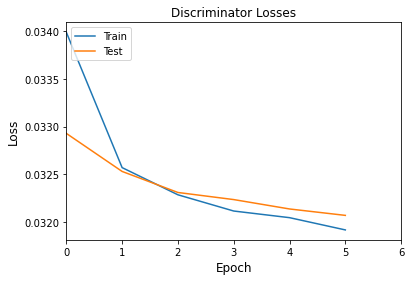

In [42]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss'])
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('losses.pdf')

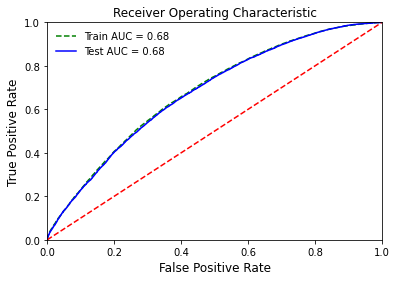

In [43]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

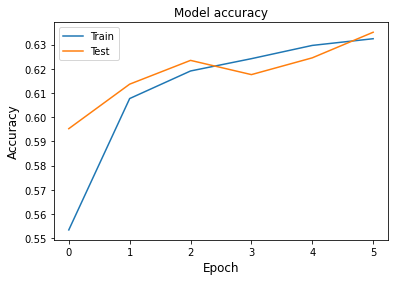

In [14]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy'])
plt.plot(discriminator_history.history['val_accuracy'])
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.pdf')

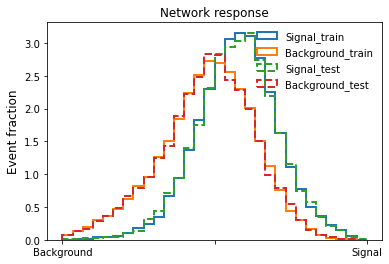

In [15]:
# plotSeparation

signal_histo = []
background_histo = []
signal_histo_train = []
background_histo_train = []
for i in range(len(sample_validation)):
    if target_validation[i] == 1:
        signal_histo.append(model_prediction[i])
    if target_validation[i] == 0:
        background_histo.append(model_prediction[i])
for i in range(len(sample_training)):
    if target_training[i] == 1:
        signal_histo_train.append(model_val_prediction[i])
    if target_training[i] == 0:
        background_histo_train.append(model_val_prediction[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Signal_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Background_train")
plt.hist(signal_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Signal_test")
plt.hist(background_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Background_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Background","","Signal"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
plt.show()
#plt.savefig('separation_discriminator.pdf')